### Lab 2 Exercise

#### Question 1 : 
   * Do any preprocessing necessary. Then, answer the following questions
       - a) What are the types of attributes?
       - b) Is there any empty or null values? what approach you use to address them (remove, replace, etc.)? and why?
       - c) Any unused or irrelevant columns/attributes? What do you do to them?
       - d) What attribute(s) might be useful?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv("dataset/bank-full.csv", sep=";")

In [3]:
# create a copy for bank_df to be manipulated
bank_df2 = bank_df.copy()

---

### About the dataset

> - This dataset contains informnation about a Portuguese bank marketing campaign. 
- It's goal is to predict if the client will subscribe to a term deposit, indicated by the attribute y
- The attributes are of 3 categories
    1. Client Data
    2. Last contact of the current campaign
    3. Other attributes


## 1. Client Data:<br>
<a id="bank_client_data"></a>
1.  `age`: (numeric)<br>
2.  `job`: type of job $\rightarrow$ (categorical: **'admin.'**,**'blue-collar'**,**'entrepreneur'**,**'housemaid'**,**'management'**,**'retired'**,**'self-employed'**,**'services'**,**'student'**,**'technician'**,**'unemployed'**,**'unknown'**)<br>
3.  `marital`: marital status $\rightarrow$ (categorical: **'divorced'**,**'married'**,**'single'**,**'unknown'**; note: 'divorced' means divorced or widowed)<br>
4.  `education`: (categorical: **primary**, **secondary**, **tertiary** and **unknown**)<br>
5.  `default`: has credit in default? $\rightarrow$ (categorical: **'no'**,**'yes'**,**'unknown'**)<br>
6.  `housing`: has housing loan? $\rightarrow$ (categorical: **'no'**,**'yes'**,**'unknown'**)<br>
7.  `loan`: has personal loan? $\rightarrow$ (categorical: **'no'**,**'yes'**,**'unknown'**)<br>
8.  `balance`: Balance of the individual.$\rightarrow$ numeric

---

### 2. (related to) last contact of the current campaign
9. `contact`: contract communication type $\rightarrow$ (categorical: **'cellular'**, **'telephone'**)
10. `month` : last contact month of year $\rightarrow$ (categorical: **'jan'**, **'feb'**, **'mar'**, ..., **'nov'**, **'dec'**)
11. `day` : last contact day of the week $\rightarrow$ (categorical: **'mon'**,**'tue'**,**'wed'**,**'thu'**,**'fri'**)
12. `duration`: last contract duration (in seconds) $\rightarrow$ numeric
---

### 3. Other attributes
13. `campaign`: number of contacts performed during this campaign and for this client  $\rightarrow$ numeric
14. `pdays` :  number of days that passed by after the client was last contacted from a previous campaign $\rightarrow$ numeric (**999** means the client was not previously contacted)
15. `poutcome` : outcomne of the previous marketing campaign (categorical: **'failure'**, **'nonexistent'**, **'success'**)

#### Output variable:
16. `y` : has the client subscribed a term deposit? $\rightarrow$ binary: **'yes'**, **'no'**

In [4]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


> - a) What are the types of attributes?
- b) Is th ere any empty or null values?

In [6]:
# checking for the amount of null values 
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# alternative method for checking Null-values and chek for attribute types.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Therefore, based on two methods above, we can conclude that there is not any null-values on this dataset

#### c) Any unused or irrelevant columns/attributes? what do you do to them?

> To answer this, we need to analyze correlation between the variables to gain insights of the weight of importance of each attribute in predicting the ourcome of `y`


#### invalid values 
Notice that there are "unknowns" in many of the attributes. Before deciding what to do with it, we have to know whether those "unknown"s represent significant proportion of the sample
   - columns with "unknown" values : job, marital, education, default, housing, loan


In addition, there are also columns that may contains invalid values and assign it into a specific deisgnated value
- pdays (numerical) $\rightarrow$ '999' (client wasn't previously contacted)
- poutcome (categorical) $\rightarrow$ 'nonexistent'


**note: Although '999' `pdays` column can be considerd as invalid, we will leave it just as it is for now because we don't want to remove all the data where the participant was being called for the first-time**

------

#### investigating the categorical values' distribution

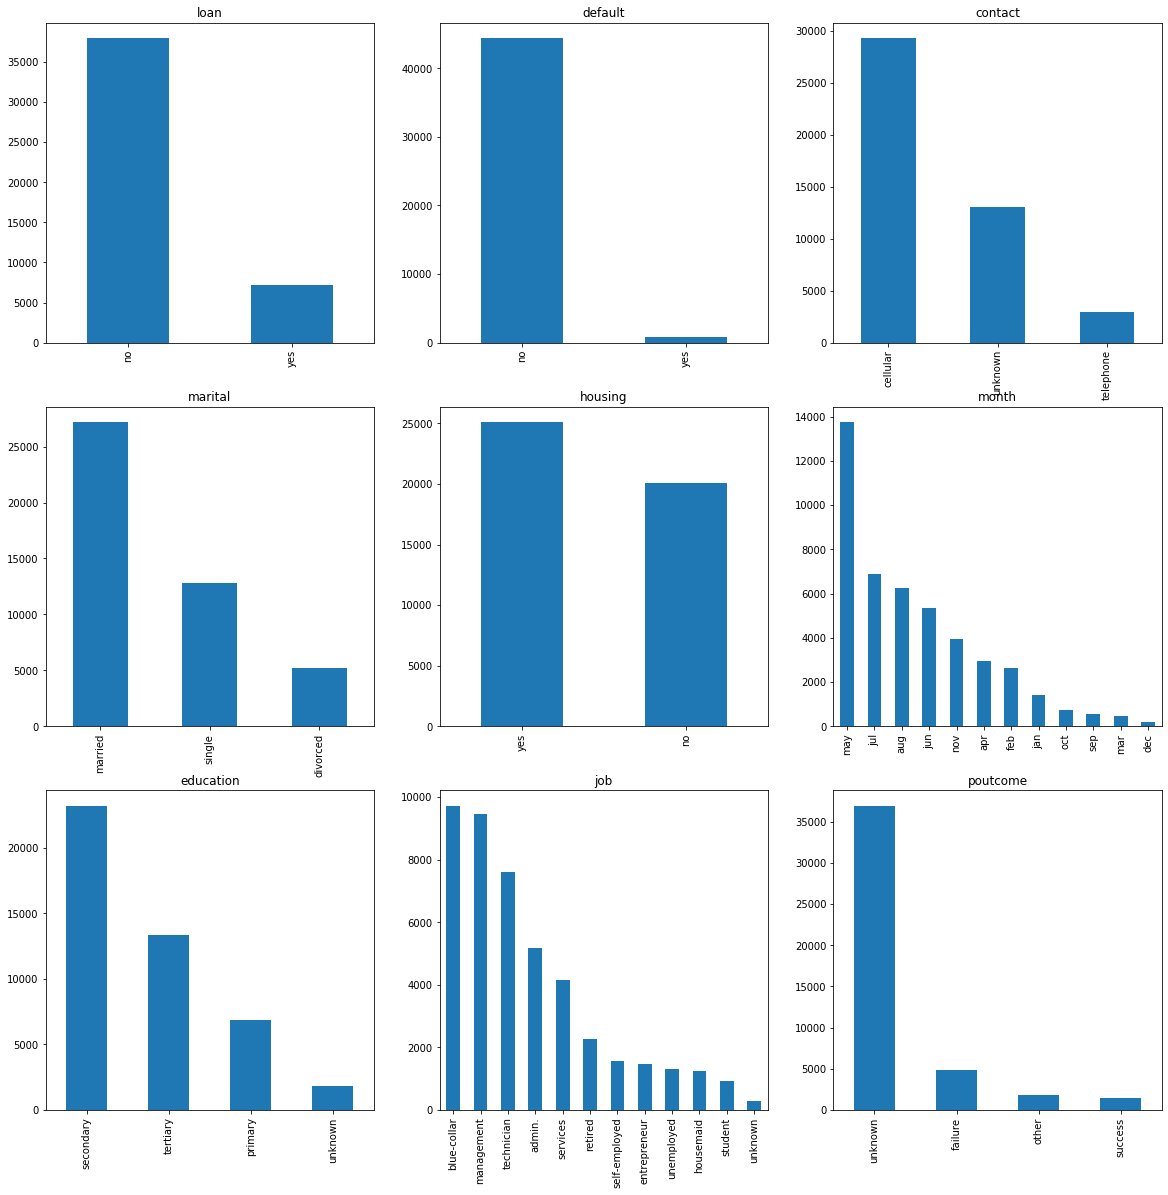

In [8]:
# using bar chart
column_categories = ['loan', 'marital', 'education', 'default', 'housing', 
                     'job', 'contact', 'month', 'poutcome']

# set up the frame for plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

# assigning plots of defined categories into the subplots frame
for i, col in enumerate(column_categories):
    row_index = (i % 3) 
    col_index = int(i / 3)
    fig.add_subplot(bank_df[col].value_counts().plot.bar(ax=axes[row_index, col_index], title=col))

> From the visualization above, we can see that:
- There are imbalances across categorical attributes
- The `poutcome` and `contact` column contain significant proportion of invalid values ('unknown')
- The 'unknown' values in `education` column can indicate those who are not enrolled into formal education, therefore it shoudn't be dropped
- We can drop rows with "unknown" values in `job` column since it doesn't represent significant proportion of the sample

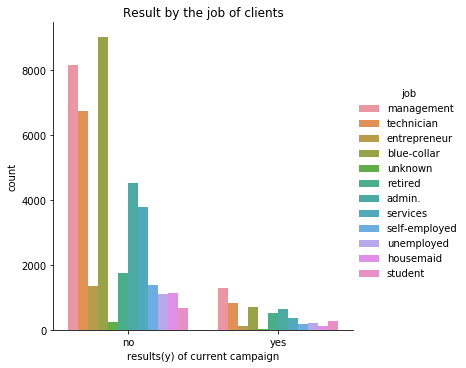

In [9]:
# exploring job type vs current campaign result/outcome
sns.catplot(x="y", hue="job", kind="count", data = bank_df2)
plt.title ('Result by the job of clients')
plt.xlabel("results(y) of current campaign")
plt.show ()

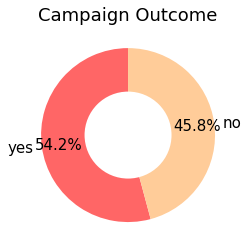

In [10]:
# Distribution of y in Pie chart

#Data to plot
labels_outcome = ['yes', 'no']
sizes_outcome = [2175, 1839]
colors_house = ['#ff6666', '#ffcc99']

# Plot
plt.rcParams.update({'font.size': 15})

plt.figure(0)
plt.pie(sizes_outcome, labels=labels_outcome, colors=colors_house, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
plt.title ('Campaign Outcome')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

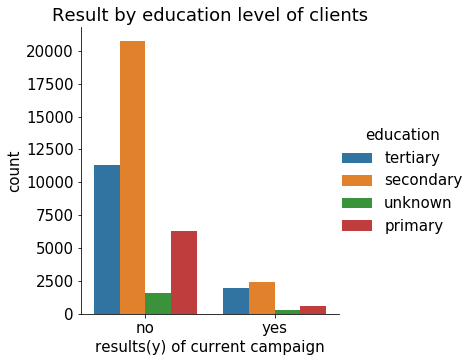

In [11]:
# exploring job type vs current campaign result/outcome
sns.catplot(x="y", hue="education", kind="count", data = bank_df)
plt.title ('Result by education level of clients')
plt.xlabel("results(y) of current campaign")
plt.show ()

In [1]:
# exploring job type vs current campaign result/outcome
sns.catplot(x="y", kind="count", data = bank_df)
plt.title ('Result by education level of clients')
plt.xlabel("results(y) of current campaign")
plt.show ()

NameError: name 'sns' is not defined

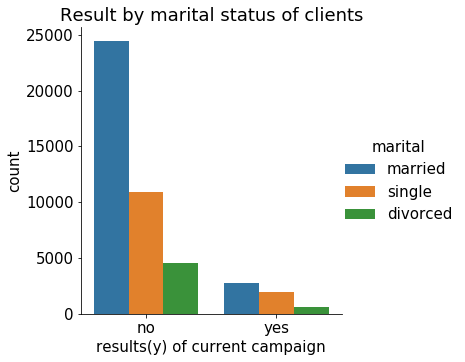

In [12]:
# exploring job type vs current campaign result/outcome
sns.catplot(x="y", hue="marital", kind="count", data = bank_df)
plt.title ('Result by marital status of clients')
plt.xlabel("results(y) of current campaign")
plt.show ()

---

#### investigating the numerical values' distribution


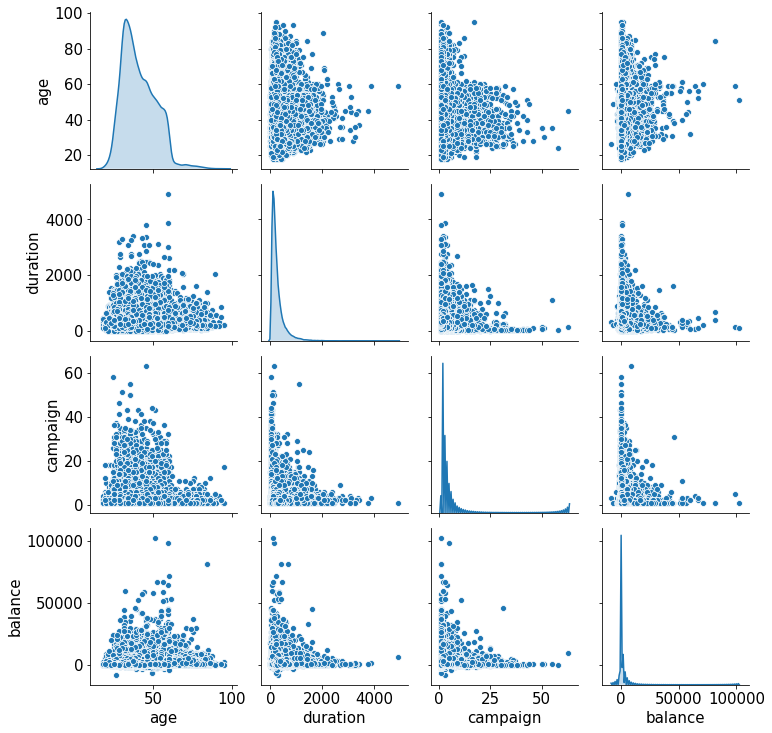

In [13]:
#scatter matrix for numeric value, we can see that most of the numerical value is scattered

g = sns.pairplot(bank_df[["age", "duration", "campaign", "balance"]], diag_kind="kde")
plt.show ()

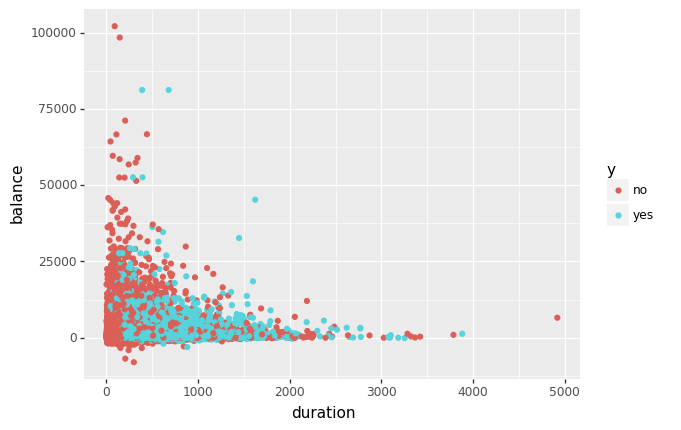

<ggplot: (-9223371950169231020)>

In [14]:
# import ggplot
from plotnine import ggplot, aes, scale_color_manual, geom_point, xlim

# Influence of duration and balance on Y
(
    ggplot(bank_df, aes(x="duration", y="balance", colour="y")) +
    geom_point() 
)    

> From scatterplot above, while there seems to be no influence from the balance attribute, there's an indication that above a certain duration of previous calls the target client seems to be more likely to subscribe to a term deposit.
However, taking it into real life context, the lower duration of previous calls could also indicate that the target client might be busy at the time thus rejecting the offer.

---
#### Question 2 :

* Experiment with KNN machine learning algorithm to predict your Class label based on yourselected data. 


* Use default KNN configurations and try at least two different values of k. 


* Try conduct also with custom KNN configurations with at least 5 fold cross-validation. 
    - Compare thetwo KNN and specify your findings. Do higher values of k lead to better performance? Do cross-validation effect KNN performance?

You may discuss with your friends and complete the lab exercise. Post your solution on Lab 02Submission on elearn@usm. Make sure you include your name on the submission post

### Data Preprocessing

In [15]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encoding/transforming categorical columns
bank_df2['job'] = labelencoder.fit_transform(bank_df2['job'].astype('str'))
bank_df2['marital'] = labelencoder.fit_transform(bank_df2['marital'].astype('str'))
bank_df2['education'] = labelencoder.fit_transform(bank_df2['education'].astype('str'))
bank_df2['default'] = labelencoder.fit_transform(bank_df2['default'].astype('str'))
bank_df2['housing'] = labelencoder.fit_transform(bank_df2['housing'].astype('str'))
bank_df2['loan'] = labelencoder.fit_transform(bank_df2['loan'].astype('str'))
bank_df2['contact'] = labelencoder.fit_transform(bank_df2['contact'].astype('str'))
bank_df2['month'] = labelencoder.fit_transform(bank_df2['month'].astype('str'))
bank_df2['poutcome'] = labelencoder.fit_transform(bank_df2['poutcome'].astype('str'))
bank_df2['y'] = labelencoder.fit_transform(bank_df['y'].astype('str'))

# select all columns except the last one
x = bank_df2.iloc[:,:-1]
# set categorical data label (y)
y = bank_df2.iloc[:,16]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print(x)
print(y)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration

**Splitting the data into test and train data**

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=420)

standardize the scalability of the data

In [17]:
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(x_train, y_train)
sc.fit(x_test, y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

Checking the data we have....

In [18]:
print('-------x axis test-------')
print(x_test)
print('-------x axis train-------')
print(x_train)
print('-------y axis test-------')
print(y_test)
print('-------y axis train-------')
print(y_train)

-------x axis test-------
       age  job  marital  education  default  balance  housing  loan  contact  \
20425   33    4        0          2        0     -336        0     0        0   
7244    37    9        2          1        0        3        1     0        2   
20946   52    9        0          1        0     -558        0     0        0   
28383   30    0        2          1        0       60        0     0        0   
34447   26    9        2          2        0     3628        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
25549   40    7        1          1        0      961        0     1        0   
27385   35   10        1          2        0      259        0     1        0   
38240   28    1        1          1        0      -42        1     0        0   
44679   43    9        1          1        0     4945        1     0        0   
16287   30    4        2          1        0     3259        1     0        0   

 

### Modelling

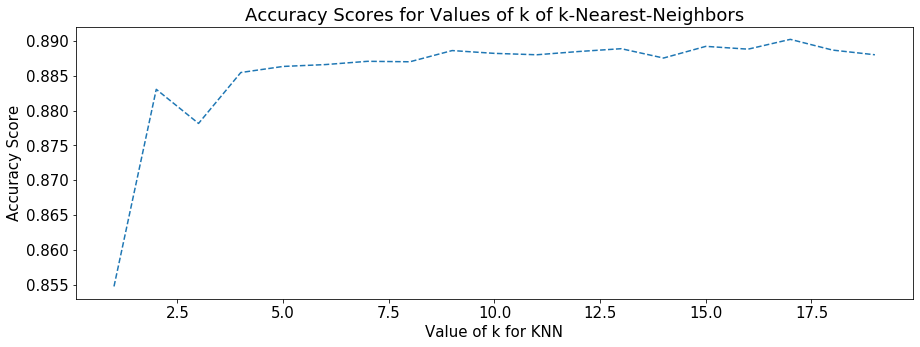

In [19]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier
# import library for evaluation metrics
from sklearn import metrics

# empty cvariable for storing the KNN metrics
scores = []

# we try different values of k for the KNN (from k=1 until k=26)
lrange=list(range(1,20))

# Loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # input the train data to train KNN
    knn.fit(x_train, y_train)
    
    # see KNN prediction by inputting the test data
    y_pred = knn.predict(x_test)
    
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(2, figsize=(15, 5))

# plot the result
plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Experiment by changing the weighting function to `distance` istead of the default `uniform`

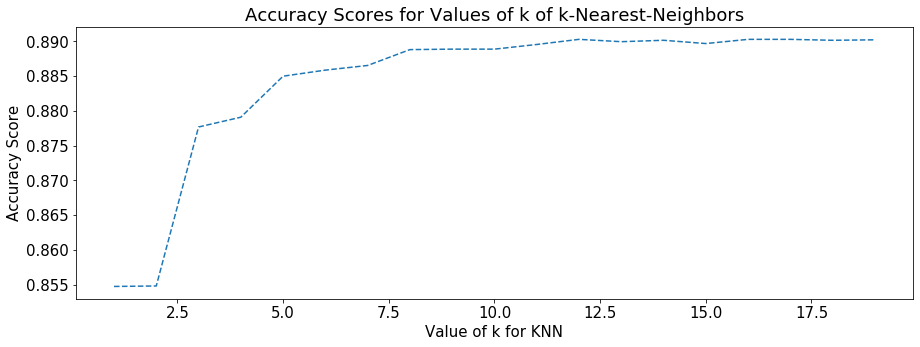

In [20]:
# empty variable for storing the KNN metrics
scores = []

# We try different values of k for the KNN
lrange =list(range(1, 20))

# Loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    
    # input the train data to train KNN
    knn.fit(x_train, y_train)
    
    # see KNN prediction by inputting the test data
    y_pred = knn.predict(x_test)
    
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.figure(2, figsize=(15, 5))

# plot the result
plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()



### Evaluate using k-Fold Cross Validation
> the purpose of this method is to estimate how above model is expected to perform in general when used to make predictions on new instances

The optimal number of neighbors is 19
The optimal score is 0.88


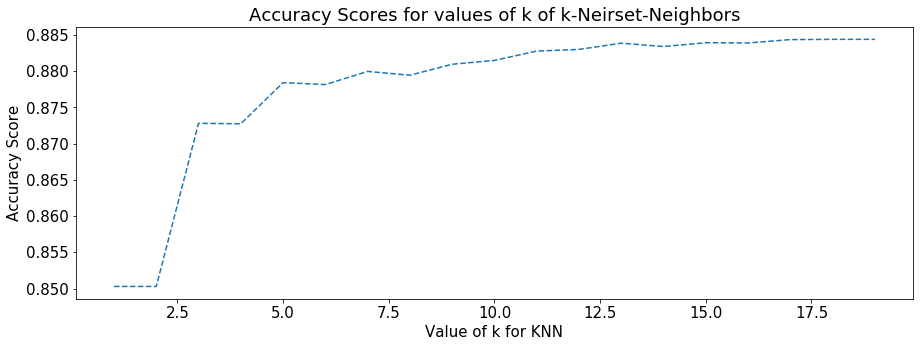

In [21]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score

scores = []

lrange=list(range(1,20))

for k in lrange:
    # input the value of k and distance measure
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # get score for the 10 fold cross validation
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2, figsize=(15,5))

# plot the result
plt.plot(lrange, scores, ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for values of k of k-Neirset-Neighbors')
plt.show()